In [ ]:
'''
Momentum : Accelerate the SGD (Speedup the SGD) in the relevant direction and reduces oscillations(variance).

SGD without momentum : Update takes longer verticle steps[Slower Learnig] then horizontal steps[faster learning]
SGD without momentum : Update takes longer horizontal steps[Fatser Learnig] then verticle steps[Slower learning]

'''

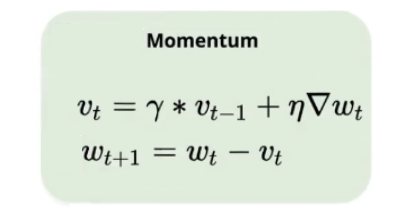

In [ ]:
'''

Varibales in momentum Gradient Descent
    - V  : velocity 
    - β (constant) :  Friction coefficient/smoothing constant which helps in controlling the value of V 
                      and avoids overshooting the minima and simultaneously allowing faster convergence
    - momentum (gamma): denotes the how much of momentum we need to impart to the algorithm
                      
    - V : Hyperparameter
    
    - vw and vb :Varibales used to compute the movement of the gradient based on the history as well as the current gradient.
    
    - vw = momentum * vw + lr * dtheta0
    - theta0 = theta0 - vw
    
    - vb = momentum * vb + lr * dtheta1
    - theta1 = theta1 - vb

'''

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

X = [30, 35, 37, 59, 70, 76, 88, 100 ]
Y = [1100, 1423, 1377, 1800, 2304, 2588, 3495, 4839]

X = np.reshape(X,(-1,1))
Y = np.reshape(Y,(-1,1))

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

n = len(Y)
learningrate = 0.1

In [2]:
lr = 0.1
max_epochs = 1000

momentum = 0.2

vw = 0.0
vb = 0.0

print("Some of the initial parameters for Momentum\n")

print("Learnig rate:",lr)
print("momentum:",momentum)

Some of the initial parameters for Momentum

Learnig rate: 0.1
momentum: 0.2


In [3]:
theta0 = 0.0
theta1 = 0.0

loss_history_mom = []
iteration_mom = []

# Compute cost Function
n = len(Y)

for epoch in range(max_epochs):
    
    iteration_mom.append(epoch)
    
    dtheta0 = 0
    dtheta1 = 0
    
    for x,y in zip(X,Y):
        
        # Inference : find y_pred
        predicted = theta0 * x + theta1
        
        # loss_derivative
        dtheta0  += (-(2/n) * np.sum(np.subtract(y,predicted)))
        dtheta1 += (-(2/n) * np.sum(np.multiply(np.subtract(y,predicted),x)))
        
    # weights_update Momentum
    vw = momentum * vw + lr * dtheta0
    theta0 = theta0 - vw
    
    vb = momentum * vb + lr * dtheta1
    theta1 = theta1 - vb
    
    # Get the cost value for latest weights
    predicted = theta0 * x + theta1
    cost = (1/n)*np.sum(np.square(y - predicted))
    loss_history_mom.append(cost)

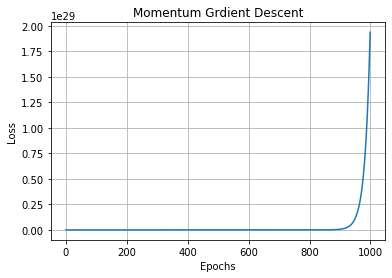

In [4]:
plt.plot(iteration_mom,loss_history_mom)
plt.title("Momentum Grdient Descent")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()